In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')
df = pd.read_csv(r'', #importing our data
                parse_dates=['Date'],
                index_col='Date',
                date_parser=dateparse)
                
df.sort_index(inplace=True)
print(f'Data shape: {df.shape}')
display(df.head())

Data shape: (1235, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-05,612.000000,617.500000,603.700012,613.674988,579.627197,2508486
2017-01-06,619.500000,619.500000,608.599976,610.224976,576.368652,2254066
2017-01-09,609.650024,611.974976,600.500000,602.000000,568.599915,1042782
2017-01-10,600.500000,608.299988,600.500000,606.750000,573.086365,558120
2017-01-11,608.625000,618.875000,606.825012,616.000000,581.823242,1411696


In [4]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts['Close'] = pd.to_numeric(ts['Close'] , errors='coerce')
ts.dropna(inplace=True)
ts.drop(['Open', 'High', 'Volume', 'Low', 'Adj Close'], axis=1, inplace=True)

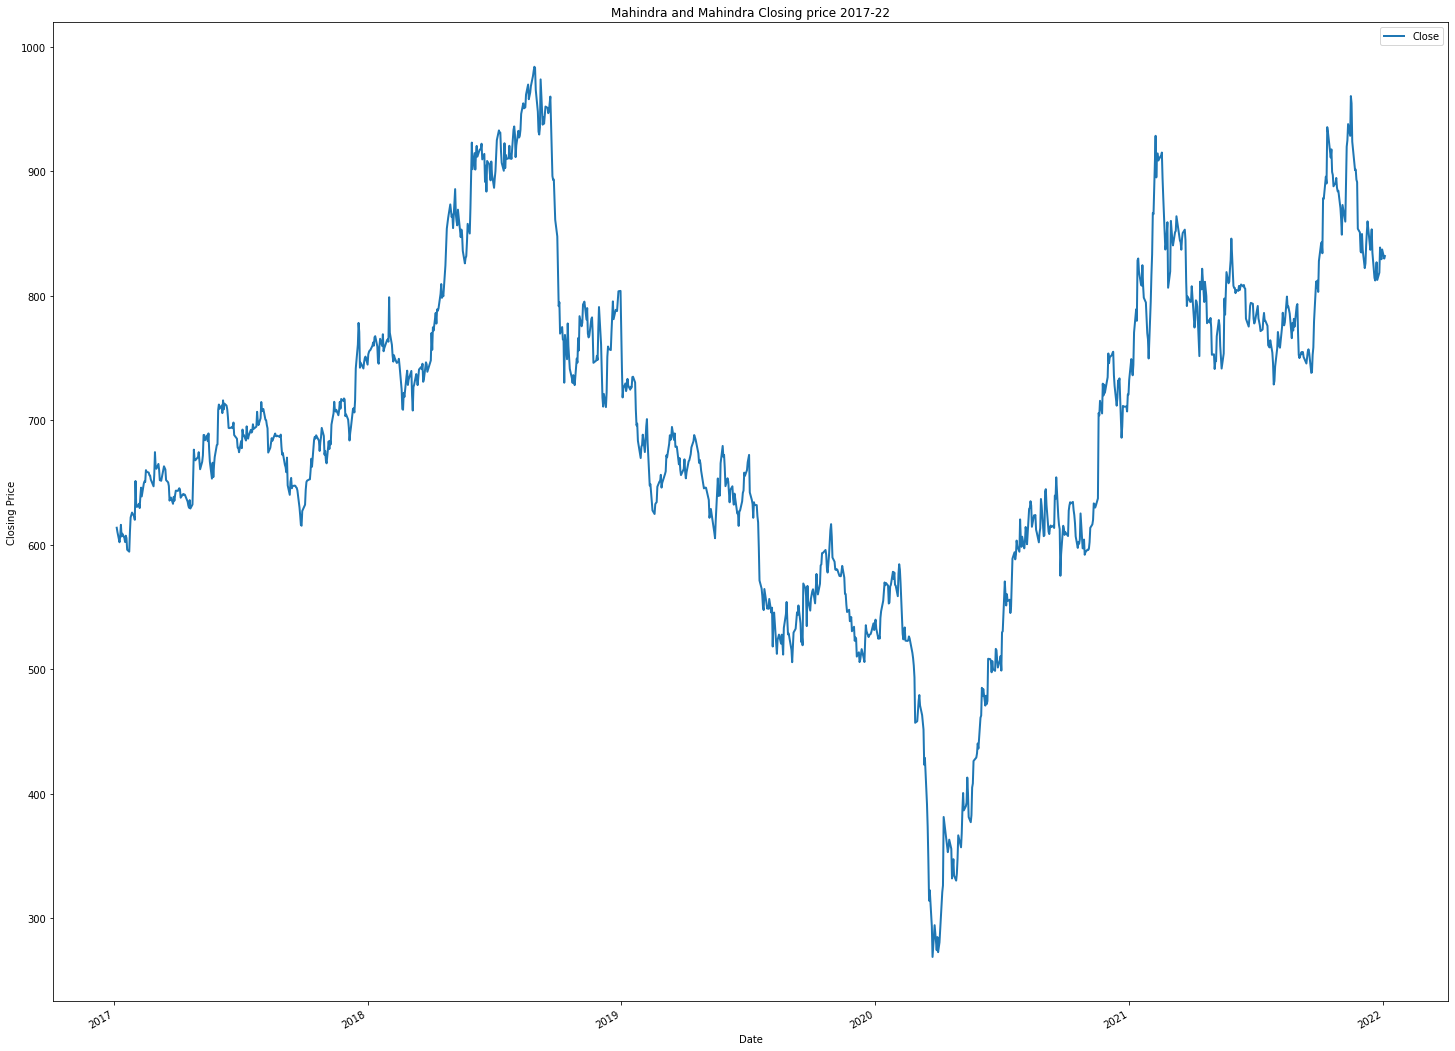

In [5]:
fig, ax = plt.subplots(figsize=(25, 20))
ts.plot(ax=ax, lw=2)
plt.ylabel('Closing Price')
plt.title('Mahindra and Mahindra Closing price 2017-22')
plt.show()

[[  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [  0.      ]
 [613.674988]
 [610.224976]
 [602.      ]
 [606.75    ]
 [616.      ]
 [606.700012]
 [608.924988]
 [605.5     ]
 [602.224976]
 [607.299988]
 [605.400024]
 [596.025024]
 [594.450012]
 [610.349976]
 [621.900024]
 [625.849976]
 [622.799988]
 [620.049988]
 [651.200012]
 [632.474976]
 [630.349976]
 [632.950012]
 [629.474976]
 [638.650024]
 [645.849976]
 [638.825012]
 [649.325012]
 [650.924988]
 [650.424988]
 [659.924988]
 [658.575012]
 [657.974976]
 [655.825012]
 [655.599976]
 [652.424988]
 [646.924988]
 [656.075012]
 [674.375   ]
 [662.5     ]
 [661.025024]
 [664.900024]
 [660.125   ]
 [651.775024]
 [651.974976]
 [651.375   ]
 [663.      ]
 [661.775024]
 [660.450012]
 [651.924988]
 [650.099976]
 [647.200012]
 [635.

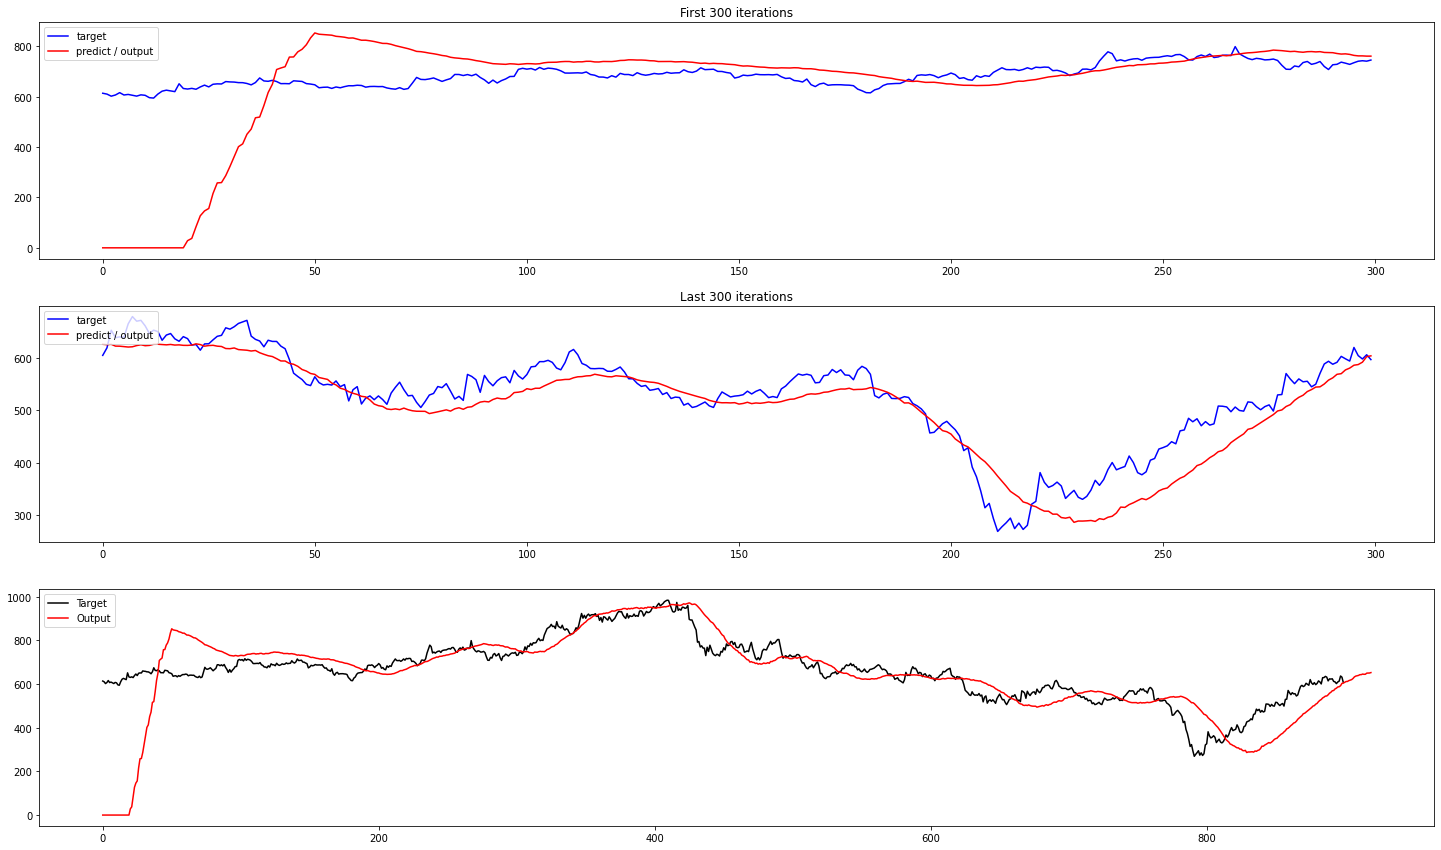

[[0.86199794 1.4667316  1.52219386 2.1486294  2.52014266 2.89758055
  3.73761184 4.9478569  5.586827   5.81632618 6.11257636 6.66089367
  6.70418677 7.13159844 6.95290407 7.01020851 7.84407322 7.89420745
  7.93210514 8.25643385]]


In [11]:
def lmsPred(x,l,u,N):
    lmsPred.xd= np.block([np.zeros((1,l)), x]).T
    y=np.zeros((len(lmsPred.xd),1))
    xn=np.zeros((N+1,1))
    xn = np.matrix(xn)
    wn=np.random.rand(N+1,1)/10
    M=len(lmsPred.xd)
    for n in range(0,M):
        xn = np.block([[lmsPred.xd[n]], [xn[0:N]]]);
        y[n]= np.matmul(wn.T, xn);
        if(n>M-l-1):
            e =0;
        else:
            e=int(x[n]-y[n]);
        wn = wn + 2*u*e*xn;
        
    return y,wn;

x = ts['Close'].values.flatten()[: 900]  # initial timeseries data    
u = 2**(-30);
l=20;  
N=30;  #choose your filter order
y,wn = lmsPred(x,l,u,N)
print(lmsPred.xd)
plt.subplots(figsize=(25, 20))
plt.subplot(412)
plt.title('First 300 iterations')
plt.xlabel(None)
plt.plot(x[: 300], "b", label='target')
plt.plot(y[: 300], "r", label='predict / output')
plt.legend(loc='upper left')
plt.subplot(413)
plt.title('Last 300 iterations')
plt.xlabel(None)
plt.plot(x[(len(x) - 300 - l): (len(x) - l)],
                 "b", label='target')
plt.plot(y[(len(y) - 300 - l): (len(y) - l)],
                 "r", label='predict / output')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(x, color = 'black',label='Target')
plt.plot(y, color = 'red',label='Output')
plt.legend(loc='upper left')
plt.show()

pred = y[-l:]
realvalues = x[-l]
error = 100*(pred.T-realvalues)/realvalues

print(abs(error))